In [1]:
# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data

In [6]:
data = pd.read_excel(r"C:/Users/abinc/Downloads/iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.shape

(150, 5)

In [10]:
# Basic statistical analysis about the data

In [12]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Checking the missing values

In [14]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [15]:
# Filling the missing values

In [16]:
for i in ["SL", "SW","PL"]:
    data[i]= data[i].fillna(data[i].median())

In [17]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [18]:
# Label Encoding on Classification

In [19]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
data["Classification"] = le.fit_transform(data["Classification"])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [25]:
y = data["Classification"]
x = data.drop("Classification", axis=1)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [27]:
x_train.shape

(120, 4)

## Classification

##### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

C:\Users\abinc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred = log_model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 1.0


In [34]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [35]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

#### kNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
metric_k = []
neighbors = np.arange(3,15)

In [38]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

In [39]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

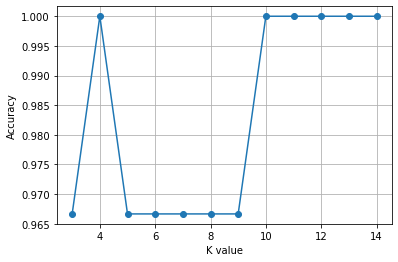

In [40]:
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [55]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train,y_train)
y_prediction = classifier.predict(x_test)
    

In [42]:
print('Accuracy is :',accuracy_score(y_test,y_prediction1))

Accuracy is : 1.0


In [43]:
confusion_matrix(y_test,y_prediction)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

#### SVM Model

In [44]:
from sklearn.svm import SVC

In [45]:
# svm kernel linear

In [46]:
svm_cls = SVC(kernel = 'linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_svm)

1.0

In [50]:
# svm kernel rbf

In [51]:
svm_cls1 = SVC(kernel = 'rbf')
svm_cls1 = svm_cls1.fit(x_train,y_train)
y_pred_svm1 = svm_cls1.predict(x_test)

In [52]:
confusion_matrix(y_test,y_pred_svm1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred_svm1)

1.0

#### Decision Tree


In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
df_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)

In [57]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_dt)

1.0

#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [60]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred_rf)

1.0

Accuracy  of the models are:

Logistic regression = 100%

kNN model = 100%

SVM (kernal = rbf) = 100%

SVM (kernal = linear) = 100%

Decision Tree model = 100%

Random Forest model = 100%

Thus from the above data we could conclude that every model has an accuracy of 100%.